In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('cricket.csv')

In [4]:
df

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id
0,1,Pat Cummins,DNB,3,28,0,0,19 Oct 2011,v South Africa Centurion,1
1,2,Steve Smith,DNB,-,-,0,0,19 Oct 2011,v South Africa Centurion,1
2,10,Mitch Marsh,8*,1,19,1,0,19 Oct 2011,v South Africa Centurion,1
3,13,David Warner,20,-,-,0,0,19 Oct 2011,v South Africa Centurion,1
4,1,Pat Cummins,11*,1,73,0,0,23 Oct 2011,v South Africa Gqeberha,2
...,...,...,...,...,...,...,...,...,...,...
2570,22,Ravindra Jadeja,DNB,3,35,0,0,28 Oct 2009,v Australia Nagpur,553
2571,22,Ravindra Jadeja,DNB,2,41,0,0,31 Oct 2009,v Australia Delhi,554
2572,22,Ravindra Jadeja,23,0,44,1,0,5 Nov 2009,v Australia Hyderabad,555
2573,22,Ravindra Jadeja,57,0,36,0,0,8 Nov 2009,v Australia Guwahati,556


In [5]:
import seaborn as sns

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df.player_name.unique()

array(['Pat Cummins', 'Steve Smith', 'Mitch Marsh', 'David Warner',
       'Glenn Maxwell', 'Mitchell Starc.', 'Josh Hazlewood',
       'Rohit Sharma', 'Virat Kohli', 'Mohammed Shami',
       'Ravichandran Ashwin', 'Marcus Stoinis', 'Travis Head',
       'Adam Zampa', 'Hardik Pandya', 'Jasprit Bumrah', 'Kuldeep Yadav',
       'Alex Carey', 'Ravindra Jadeja', 'KL Rahul', 'Marnus Labuschagne',
       'Shreyas Iyer', 'Shardul Thakur', 'Cameron Green', 'Josh Inglis',
       'Sean Abbott', 'Shubman Gill', 'Ishan Kishan', 'Suryakumar Yadav',
       'Mohammed Siraj'], dtype=object)

In [8]:
df['runs_scored'] = df['runs_scored'].replace('DNB', 0)

# Convert the 'runs_scored' column to numeric type
df['runs_scored'] = pd.to_numeric(df['runs_scored'], errors='coerce')

In [9]:


# Assuming your data is stored in a DataFrame called 'cricket_data'
# You can load your data like this:
# cricket_data = pd.read_csv('your_data_file.csv')

# Sort the DataFrame based on runs_scored in descending order
sorted_data = df.sort_values(by='runs_scored', ascending=False)

# Get the top 5 batsmen
top_batsmen = sorted_data.head(5)

# Display the result
print(top_batsmen[['player_name', 'runs_scored']])

       player_name  runs_scored
1700  Rohit Sharma        264.0
2560  Ishan Kishan        210.0
1320  Rohit Sharma        209.0
2162  Shubman Gill        208.0
1533   Virat Kohli        183.0


In [10]:
total_runs_by_player = df.groupby('player_id').agg({'runs_scored': 'sum', 'player_name': 'first'})

# Sort the players based on total runs in descending order
sorted_players = total_runs_by_player.sort_values(by='runs_scored', ascending=False)

# Get the top 5 batsmen
top_batsmen = sorted_players.head(5)

# Display the result
print(top_batsmen[['player_name', 'runs_scored']])

             player_name  runs_scored
player_id                            
19           Virat Kohli       9649.0
16          Rohit Sharma       7691.0
13          David Warner       6063.0
2            Steve Smith       4294.0
11         Glenn Maxwell       2998.0


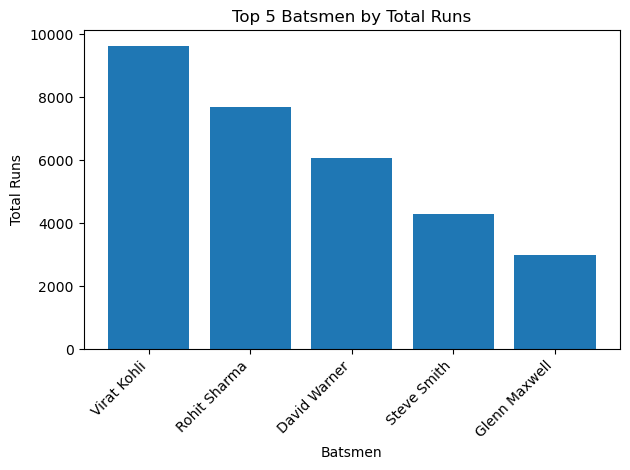

In [11]:
plt.bar(top_batsmen['player_name'], top_batsmen['runs_scored'])
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.title('Top 5 Batsmen by Total Runs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
import seaborn as sns

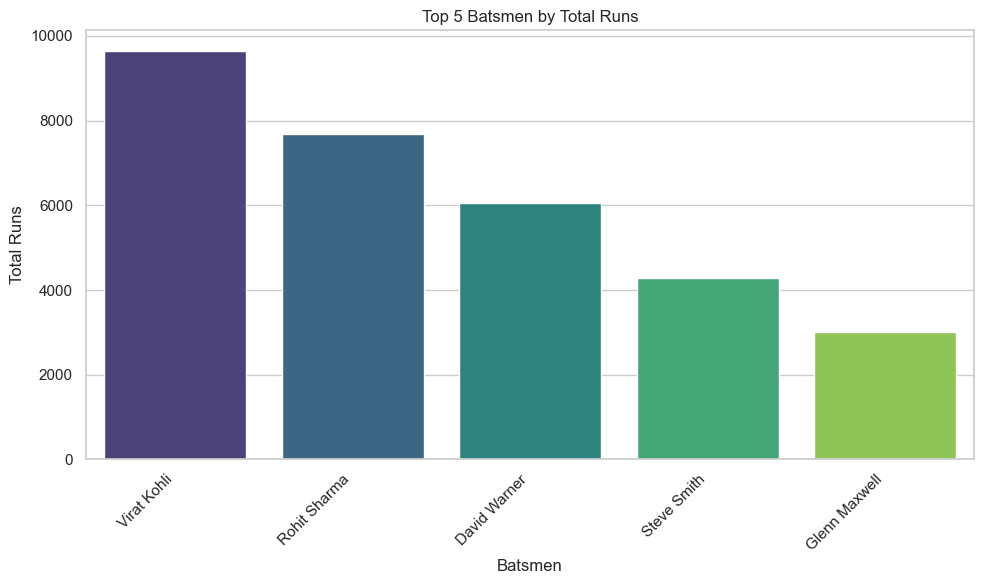

In [13]:
sns.set(style="whitegrid")

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='player_name', y='runs_scored', data=top_batsmen, palette='viridis')
plt.xlabel('Batsmen')
plt.ylabel('Total Runs')
plt.title('Top 5 Batsmen by Total Runs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

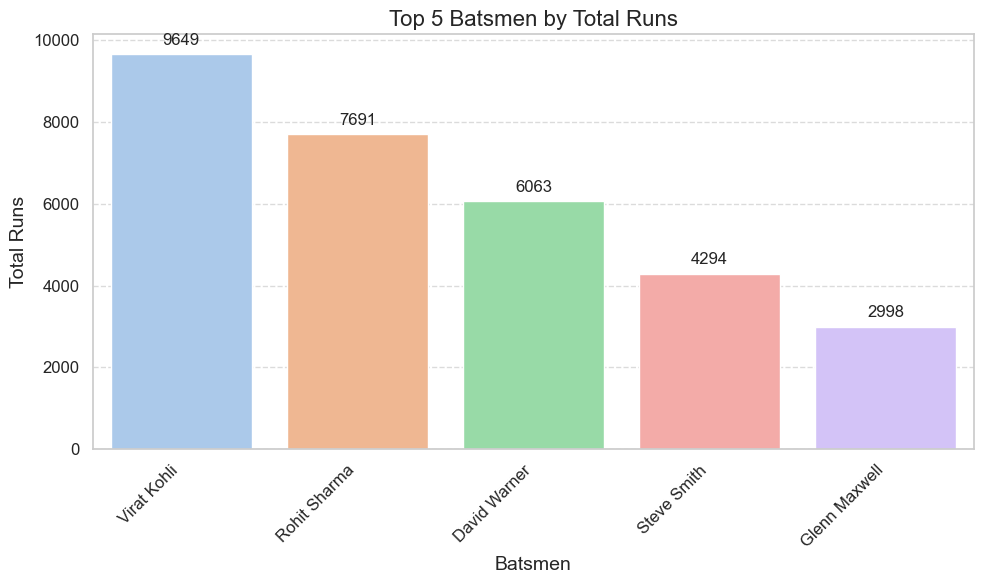

In [14]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Plotting the bar chart using Seaborn with additional customization
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='player_name', y='runs_scored', data=top_batsmen)
plt.xlabel('Batsmen', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.title('Top 5 Batsmen by Total Runs', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()